In [1]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-06-10'

outfile = 'covid_active_workplaces_0610.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['workplace','address1', 'county', 'start', 'end', 'cases', 'report_date'])

file = "../or_weekly_reports/COVID-19-Weekly-Report-%s-FINAL.pdf" % DATE_STRING
pdf = pdfplumber.open(file)


In [2]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "words",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [3]:


pagenumber = 8

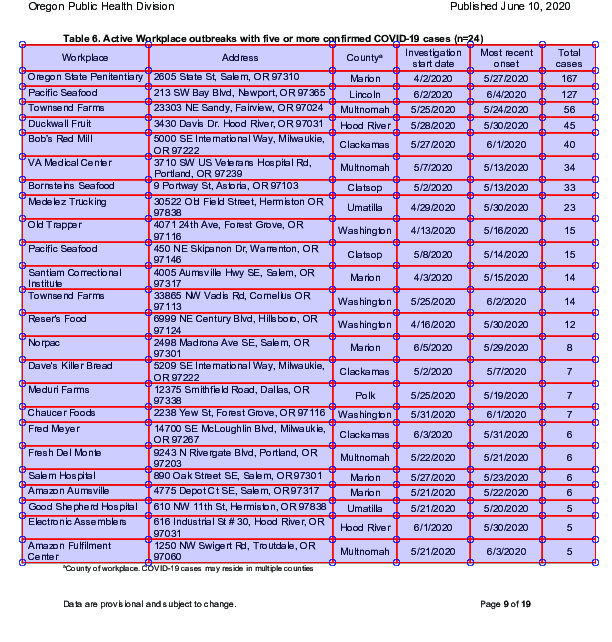

In [4]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [5]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]

    if not this_row[0]:
        # hack for misread 
        print("Empty-ish row, continuing")
        continue
    print(len(this_row))
    assert len(this_row)==6
    print(this_row)
    this_row.append(DATE_STRING)
    writer.writerow(this_row)
    

6
['Oregon State Penitentiary', '2605 State St, Salem, OR 97310', 'Marion', '4/2/2020', '5/27/2020', '167']
6
['Pacific Seafood', '213 SW Bay Blvd, Newport, OR 97365', 'Lincoln', '6/2/2020', '6/4/2020', '127']
6
['Townsend Farms', '23303 NE Sandy, Fairview, OR 97024', 'Multnomah', '5/25/2020', '5/24/2020', '56']
6
['Duckwall Fruit', '3430 Davis Dr. Hood River, OR 97031', 'Hood River', '5/28/2020', '5/30/2020', '45']
6
['Bob’s Red Mill', '5000 SE International Way, Milwaukie, \nOR 97222', 'Clackamas', '5/27/2020', '6/1/2020', '40']
6
['VA Medical Center', '3710 SW US Veterans Hospital Rd, \nPortland, OR 97239', 'Multnomah', '5/7/2020', '5/13/2020', '34']
6
['Bornsteins Seafood', '9 Portway St, Astoria, OR 97103', 'Clatsop', '5/2/2020', '5/13/2020', '33']
6
['Medelez Trucking', '30522 Old Field Street, Hermiston OR \n97838', 'Umatilla', '4/29/2020', '5/30/2020', '23']
6
['Old Trapper', '4071 24th Ave, Forest Grove, OR \n97116', 'Washington', '4/13/2020', '5/16/2020', '15']
6
['Pacific Se

In [6]:
## that's the end! In other reports there might be more. 

In [7]:
outfileh.close()
